In [25]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import cv2
import os

from keras import backend as K
K.set_image_dim_ordering('th')

%matplotlib inline


In [26]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')

    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

    x_train = x_train / 255
    x_test = x_test / 255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [27]:
x_train, y_train, x_test, y_test = load_data()
num_classes = y_test.shape[1]

# O model será exportado para este arquivo
filename='mnistneuralnet.h5'

In [40]:
def model():
    model = Sequential()

    model.add(Conv2D(60, (26, 26), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (15, 15), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (8, 8), input_shape=(1, 28, 28), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax', name='predict'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [41]:
model = model()
model.summary()

ValueError: Negative dimension size caused by subtracting 15 from 1 for 'conv2d_22/convolution' (op: 'Conv2D') with input shapes: [?,1,1,60], [15,15,60,30].

In [15]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)
model.save_weights(filename)

model.load_weights('./{}'.format(filename) )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.8747 - acc: 0.7047 - val_loss: 0.2516 - val_acc: 0.9217
Epoch 2/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.3663 - acc: 0.8816 - val_loss: 0.1726 - val_acc: 0.9460
Epoch 3/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.2936 - acc: 0.9030 - val_loss: 0.1498 - val_acc: 0.9547
Epoch 4/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.2562 - acc: 0.9158 - val_loss: 0.1222 - val_acc: 0.9609
Epoch 5/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.2362 - acc: 0.9227 - val_loss: 0.1207 - val_acc: 0.9632
Epoch 6/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.2124 - acc: 0.9313 - val_loss: 0.1122 - val_acc: 0.9660
Epoch 7/10
60000/60000 [==============================] - 24s 392us/

In [16]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 97.22%


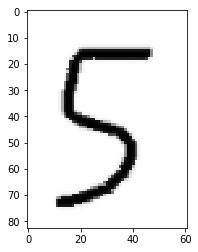

In [22]:
img_pred = cv2.imread("number-five.png", 0)
plt.imshow(img_pred, cmap='gray')

In [23]:
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0


In [24]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " com confiança de ", pred_proba)

5  com confiança de  39.21%
